## Regression vs. logistic regression approach to classification, part 2

In this lab, we will retake lab 1 and compare the results with the logistic regression

### A few imports

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from ipywidgets import Output
from IPython.display import display
from sklearn.linear_model import LinearRegression, LogisticRegression


### Initialisations

In [2]:
# Initial data

x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])


In [3]:
# Calculates linear regression and returns prediction on [-10-10] interval

def draw_linear_regression(x,y,xmin,xmax):

        # instantiating and fitting model

    model = LinearRegression()
    model.fit(x.reshape(-1,1),y)

    # Generating output score from linear model
    output=model.predict([[xmin],[xmax]]).reshape(-1,1)

    # calculating the point where the score reaches 0.5
    x_threshold = ((0.5 - model.intercept_)/model.coef_)[0]


    return np.hstack(([[xmin],[xmax]],output)),  x_threshold



In [4]:
# Calculates logistic regression and returns prediction on [-10-10] interval

def draw_logistic_regression(x,y,xmin,xmax):

    # instantiating and fitting model
    model = LogisticRegression()
    model.fit(x.reshape(-1,1),y)

    # Data where to make predictions
    x_output = np.linspace(xmin,xmax,100).reshape(-1,1)

    # Generating output probabilities
    output_proba=model.predict_proba(x_output)[:,1].reshape(-1,1)

    # calculating the point where the probability reaches 0.5
    x_threshold = -((model.intercept_)/model.coef_)[0,0]

    return np.hstack((x_output,output_proba)),  x_threshold



In [5]:
# Creating widget

# Create an output widget
out = Output()
display(out)
plt.ioff()

# Set up the plot
fig, ax = plt.subplots(figsize = (10,5),nrows=1,ncols=2)
ax[0].set_title('Click in this figure to add points to add points')
fig.suptitle('Linear regression vs. Logistic regression')

# common elements
for i in range(2):
    ax[i].set_xlim(-10, 10)
    ax[i].set_ylim(-1, 2)
    ax[i].grid()


# Graphics elements for left plot    
points_l, = ax[0].plot(x_train[y_train==1], y_train[y_train==1], 'ro')  # 'ro' means red color, circle markers
points2_l, = ax[0].plot(x_train[y_train==0], y_train[y_train==0], 'bx')  # 'bx' means blue color, cross markers
linedata,threshold_linreg = draw_linear_regression(x_train,y_train,-10,10)
lineout_l, = ax[0].plot(linedata[:,0], linedata[:,1],  'r')  
blues_l = ax[0].axvspan(-10,threshold_linreg,-2,2,color='b',alpha=0.5)
reds_l = ax[0].axvspan(threshold_linreg,10,-2,2,color='r',alpha=0.5)


# Graphics elements for right plot    
points_r, = ax[1].plot(x_train[y_train==1], y_train[y_train==1], 'ro')  # 'ro' means red color, circle markers
points2_r, = ax[1].plot(x_train[y_train==0], y_train[y_train==0], 'bx')  # 'bx' means blue color, cross markers
probadata,threshold_logreg = draw_logistic_regression(x_train,y_train,-10,10)
lineout_r, = ax[1].plot(probadata[:,0], probadata[:,1],  'r')  
blues_r = ax[1].axvspan(-10,threshold_logreg,-2,2,color='b',alpha=0.5)
reds_r = ax[1].axvspan(threshold_logreg,10,-2,2,color='r',alpha=0.5)






Output()

### Interaction with widget functions

In [6]:



# Define the click event handler
def onclick(event):
    if event.inaxes is not None:
        xdata_1 = points_l.get_xdata()
        ydata_1 = points_l.get_ydata()
        xdata_2 = points2_l.get_xdata()
        ydata_2 = points2_l.get_ydata()
        if event.ydata>0.5:
            xdata_1 = list(xdata_1) + [event.xdata]
            ydata_1 = list(ydata_1) + [1] 
        else:
            xdata_2 = list(xdata_2) + [event.xdata]
            ydata_2 = list(ydata_2) + [0] 


        points_l.set_data(xdata_1, ydata_1)
        points2_l.set_data(xdata_2, ydata_2)
        points_r.set_data(xdata_1, ydata_1)
        points2_r.set_data(xdata_2, ydata_2)

        xdata=np.hstack((xdata_1,xdata_2))
        ydata=np.hstack((ydata_1,ydata_2))

        linedata_l,threshold_l = draw_linear_regression(xdata,ydata,-10,10)

        lineout_l.set_data(list(linedata_l[:,0]), list(linedata_l[:,1]))
        blues_l.set_bounds((-10,-2,threshold_l+10,4))
        reds_l.set_bounds((threshold_l,-2,10-threshold_l,4))

        linedata_r,threshold_r = draw_logistic_regression(xdata,ydata,-10,10)

        lineout_r.set_data(list(linedata_r[:,0]), list(linedata_r[:,1]))
        blues_r.set_bounds((-10,-2,threshold_r+10,4))
        reds_r.set_bounds((threshold_r,-2,10-threshold_r,4))


        with out:
            for i in range(2):
                ax[i].figure.canvas.draw()

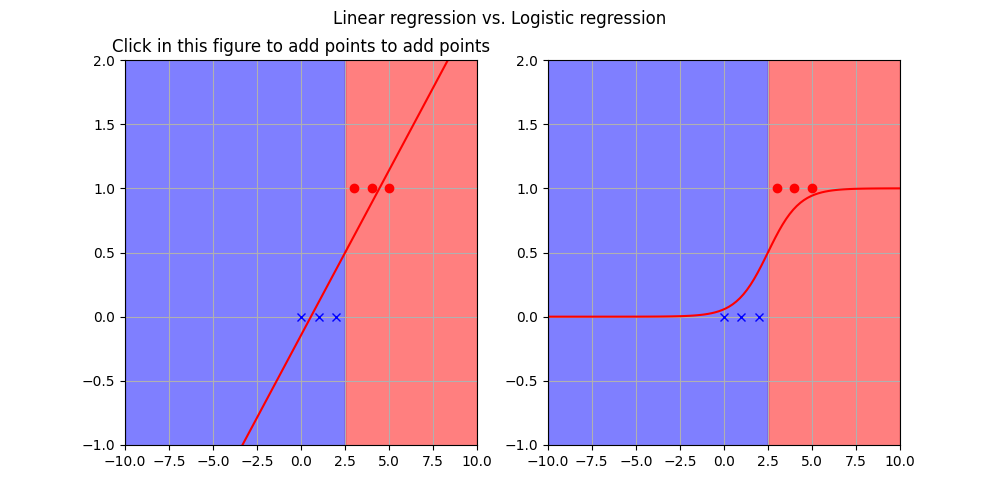

In [7]:


# Connect the event handler to the figure
cid = fig.canvas.mpl_connect('button_press_event', onclick)

# Display the plot
plt.show()



# Congratulations ! 
you understand now why logistic regression really works better on classification problems than linear regression. 